In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Import data

In [2]:
row_number = 477708
df = pd.read_fwf('../data/MCI_releases_time.csv', infer_nrows=row_number, header=None)
df = df[0].str.split(';', expand=True)
col_number = df.shape[1]
print(df.shape)

(477707, 4620)


# Data transform

In [3]:
allProjectsRhythm = []
Rhythm2018 = []
maxSize = 0
for index, row in df.iterrows():
    for i in range(2, col_number):
        if(row[i] == None):
            break
        date = datetime.strptime(row[i], '%Y-%m-%d')
        previousDate = datetime.strptime(row[i-1], '%Y-%m-%d')
        diffInDays = (date-previousDate).days
        if(diffInDays > 0):
            allProjectsRhythm.append(diffInDays)
            if(date.year <= 2018):
                Rhythm2018.append(diffInDays)

# Save data

In [4]:
with open('Rhythm2018Data.txt', 'w') as f:
    for item in Rhythm2018:
        f.write("%s\n" % item)

with open('allRhythmData.txt', 'w') as f:
    for item in allProjectsRhythm:
        f.write("%s\n" % item)

# Plot data

Medians: [14.0, 9.0]
Means:   [43.9, 35.6]
Q1: [4.0, 2.0]
Q3: [43.0, 32.0]
Minimums: [1, 1]
Maximums: [101, 77]


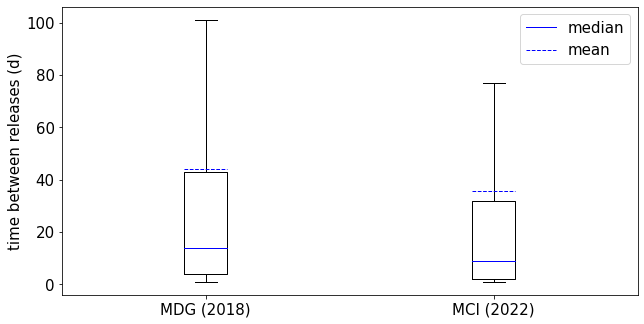

In [8]:
data = []
data.append(Rhythm2018)
data.append(allProjectsRhythm)

fig = plt.figure(figsize =(8, 4))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data, showfliers=False, showmeans=True, meanline=True)

# Get values
for median in bp['medians']:
    median.set_color('blue')
for mean in bp['means']:
    mean.set_color('blue')
medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]
means = [round(item.get_ydata()[0], 1) for item in bp['means']]
minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]
q1 = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
q3 = [round(max(item.get_ydata()), 1) for item in bp['boxes']]
print(f'Medians: {medians}\n'
      f'Means:   {means}\n'
      f'Q1: {q1}\n'
      f'Q3: {q3}\n'
      f'Minimums: {minimums}\n'
      f'Maximums: {maximums}')

plt.legend([bp['medians'][0], bp['means'][0]], ['median', 'mean'])
plt.ylabel('time between releases (d)')
ax.set_xticklabels(['MCI (up-to 2018)', 'MCI (up-to 2022)'])
plt.rcParams.update({'font.size': 15})
# show plot
plt.savefig('Maven_rhythm_boxplot.png', format='png', bbox_inches='tight')
plt.show()
plt.close()